<a href="https://colab.research.google.com/github/chaw-thiri/DatabaseCourse/blob/main/Lab_SQLite3_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# import SQLite3 library
import sqlite3

In [87]:




# Function to connect to the database
def connect_to_db(db_name):
    try:
        conn = sqlite3.connect(db_name)
        print(f"Connected to {db_name} successfully.")
        return conn
    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
        return None


In [88]:
# Function to create tables in the database
def create_tables(conn):
    try:
        cursor = conn.cursor()
        # SQL queries to create tables
        # Existing tables: Companies, Branches, Course, Students
        # New Tables: Enrollment, Logging, Teacher, Department

        # Company table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Companies(
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          name TEXT NOT NULL,
          headquarters TEXT
        );
        ''')

        # Branches table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Branches(
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          company_id INTEGER,
          location TEXT,
          FOREIGN KEY (company_id) REFERENCES Companies(id)
        );
        ''')

        # Courses table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Courses(
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          branch_id INTEGER,
          name TEXT NOT NULL,
          duration INTEGER,
          FOREIGN KEY (branch_id) REFERENCES Branches(id)
        );
        ''')

        # Students table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Students(
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          course_id INTEGER,
          name TEXT NOT NULL,
          age INTEGER,
          FOREIGN KEY (course_id) REFERENCES Courses(id)
        );
        ''')

        # Enrollment table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Enrollment(
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          student_id INTEGER,
          course_id INTEGER,
          enrollment_date TEXT,
          FOREIGN KEY (student_id) REFERENCES Students(id),
          FOREIGN KEY (course_id) REFERENCES Courses(id)
        );
        ''')

        # Logging table (fixed missing parenthesis)
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Logging(
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          activity TEXT NOT NULL,
          timestamp TEXT NOT NULL
        );
        ''')

        # Teacher table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Teachers(
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            branch_id INTEGER,
            name TEXT NOT NULL,
            subject TEXT,
            FOREIGN KEY (branch_id) REFERENCES Branches(id)
          );
        ''')

        # Department table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Department(
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            branch_id INTEGER,
            name TEXT NOT NULL,
            FOREIGN KEY (branch_id) REFERENCES Branches(id)
          );
        ''')

        # Commit the transaction
        conn.commit()

    except sqlite3.Error as e:
        # Roll back the transaction in case of an error
        conn.rollback()
        print(f"Error occurred: {e}")


In [89]:
# Function to list all the tables in the database
def list_tables(conn):
    try:
        # Create a cursor object
        cursor = conn.cursor()

        # SQL query to fetch all tables
        cursor.execute('''
        SELECT name FROM sqlite_master WHERE type="table";
        ''')

        # Fetch all the tables
        tables = cursor.fetchall()

        # Display table names
        for table in tables:
            print(f"Table: {table[0]}")

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")


In [90]:
if __name__ == "__main__":
    # Connect to SQLite database
    conn = connect_to_db("education_company.db")
    if conn:
        # Create tables
        create_tables(conn)

        print("Listing all the tables in the database:")
        list_tables(conn)

        conn.close()

Connected to education_company.db successfully.
Listing all the tables in the database:
Table: Companies
Table: sqlite_sequence
Table: Branches
Table: Courses
Table: Students
Table: Enrollment
Table: Logging
Table: Teachers
Table: Department


In [91]:
# import pandas for data vistualization
import sqlite3
import pandas as pd

In [92]:

# Function to connect to the database
def connect_to_db(db_name):
    try:
        conn = sqlite3.connect(db_name)
        print(f"Connected to {db_name} successfully.")
        return conn
    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
        return None


In [93]:
# Function to insert sample data into tables
def insert_sample_data(conn):
    try:
        cursor = conn.cursor()
        # Insert 20 sample rows into Companies table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Companies(name, headquarters) VALUES (?, ?)", (f"Company{i}", f"Location{i}"))

        # Insert 20 sample rows into Branches table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Branches(company_id, location) VALUES (?, ?)", (i, f"BranchLocation{i}"))

        # Insert 20 sample rows into Courses table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Courses(branch_id, name, duration) VALUES (?, ?, ?)", (i, f"Course{i}", i * 5))

        # Insert 20 sample rows into Students table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Students(course_id, name, age) VALUES (?, ?, ?)", (i, f"Student{i}", 20 + 5))

        # Insert 20 sample rows into Enrollment table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Enrollment(student_id, course_id, enrollment_date) VALUES (?, ?, ?)",
                           (i, i, f"2023-10-{i}"))

        # Insert 20 sample rows into Logging table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Logging(activity, timestamp) VALUES (?, ?)", (f"Activity{i}", f"2023-10-{i} 12:34:56"))

        # Insert 20 sample rows into Teacher table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Teachers(branch_id, name, subject) VALUES (?, ?, ?)",
                           (i, f"Teacher{i}", f"Subject{i}"))

        # Insert 20 sample rows into Department table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Department(branch_id, name) VALUES (?, ?)", (i, f"Department{i}"))

        # Commit the transaction
        conn.commit()

    except sqlite3.Error as e:
        conn.rollback()
        print(f"Error occurred: {e}")


In [94]:
# Function to show rows of all tables
def show_rows(conn):
    try:
        cursor = conn.cursor()

        # List of table names
        tables = ["Companies", "Branches", "Courses", "Students", "Enrollment", "Logging", "Teachers", "Department"]

        # Fetch and display rows for each table
        for table in tables:
            print(f"\nRows from {table} table: ")
            cursor.execute(f"SELECT * FROM {table}")
            rows = cursor.fetchall()
            for row in rows:
                print(row)

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")


In [95]:
def data_analytics_dashboard(conn):
    try:
        # using pandas to read SQL queries into Dataframes
        df_companies = pd.read_sql_query("SELECT * FROM Companies",conn)
        df_branches = pd.read_sql_query("SELECT * FROM Branches",conn)

        # display basic statistics for companies and branches tables
        print("\nBasic statistics for Companies table:")
        print(df_companies.describe())

        print("\nBasic statistics for Branches table:")
        print(df_branches.describe())

    except sqlite3.Error as e:
        print(f"Errror occured: {e}")


In [96]:
# main function
if __name__ == "__main__":
    conn = connect_to_db("education_company.db")
    if conn:
        # insert sample data
        insert_sample_data(conn)

        # show rows from all tables
        print("\nShowing rows from all tables:")
        show_rows(conn)

        # Data analytics dashboard
        print("\nData analytics dashboard: ")
        data_analytics_dashboard(conn)

        conn.close()


Connected to education_company.db successfully.

Showing rows from all tables:

Rows from Companies table: 
(1, 'Company1', 'Location1')
(2, 'Company2', 'Location2')
(3, 'Company3', 'Location3')
(4, 'Company4', 'Location4')
(5, 'Company5', 'Location5')
(6, 'Company6', 'Location6')
(7, 'Company7', 'Location7')
(8, 'Company8', 'Location8')
(9, 'Company9', 'Location9')
(10, 'Company10', 'Location10')
(11, 'Company11', 'Location11')
(12, 'Company12', 'Location12')
(13, 'Company13', 'Location13')
(14, 'Company14', 'Location14')
(15, 'Company15', 'Location15')
(16, 'Company16', 'Location16')
(17, 'Company17', 'Location17')
(18, 'Company18', 'Location18')
(19, 'Company19', 'Location19')
(20, 'Company20', 'Location20')

Rows from Branches table: 
(1, 1, 'BranchLocation1')
(2, 2, 'BranchLocation2')
(3, 3, 'BranchLocation3')
(4, 4, 'BranchLocation4')
(5, 5, 'BranchLocation5')
(6, 6, 'BranchLocation6')
(7, 7, 'BranchLocation7')
(8, 8, 'BranchLocation8')
(9, 9, 'BranchLocation9')
(10, 10, 'BranchL

### The following step will display 5 important data analytics dashboard functions. These functions will provide insights into:
* The distribution of students across courses
* The number of branches per companies
* The average age of students enrolled in each course
* The most and least popular course based on enrollment
* Activity logs over time.

In [97]:
# importing matplotlib for plotting , pandas for data vistualization, and sqlite3 for database operation
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
# Function to connect to the database
def connect_to_db(db_name):
    try:
        conn = sqlite3.connect(db_name)
        print(f"Connected to {db_name} successfully.")
        return conn
    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
        return None

In [99]:
# Function to insert sample data into tables
def insert_sample_data(conn):
    try:
        cursor = conn.cursor()
        # Insert 20 sample rows into Companies table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Companies(name, headquarters) VALUES (?, ?)", (f"Company{i}", f"Location{i}"))

        # Insert 20 sample rows into Branches table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Branches(company_id, location) VALUES (?, ?)", (i, f"BranchLocation{i}"))

        # Insert 20 sample rows into Courses table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Courses(branch_id, name, duration) VALUES (?, ?, ?)", (i, f"Course{i}", i * 5))

        # Insert 20 sample rows into Students table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Students(course_id, name, age) VALUES (?, ?, ?)", (i, f"Student{i}", 20 + 5))

        # Insert 20 sample rows into Enrollment table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Enrollment(student_id, course_id, enrollment_date) VALUES (?, ?, ?)",
                           (i, i, f"2023-10-{i}"))

        # Insert 20 sample rows into Logging table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Logging(activity, timestamp) VALUES (?, ?)", (f"Activity{i}", f"2023-10-{i} 12:34:56"))

        # Insert 20 sample rows into Teacher table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Teachers(branch_id, name, subject) VALUES (?, ?, ?)",
                           (i, f"Teacher{i}", f"Subject{i}"))

        # Insert 20 sample rows into Department table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Department(branch_id, name) VALUES (?, ?)", (i, f"Department{i}"))

        # Commit the transaction
        conn.commit()

    except sqlite3.Error as e:
        conn.rollback()
        print(f"Error occurred: {e}")


In [100]:
# function to create a rudimentary data_analytic dashboard
def data_analytics_dashboard(conn):
    try:
        # 1. distribution of students across courses
        df1 = pd.read_sql_query("SELECT course_id, COUNT(*) as num_students FROM Students GROUP BY course_id", conn)
        plt.bar(df1["course_id"],df1["num_students"])
        plt.title("Distribution of Students Across Courses")
        plt.xlabel("Course ID")
        plt.ylabel("Number of Students")
        plt.show()

        # 2. Number of branches per company
        df2 = pd.read_sql_query("SELECT company_id, COUNT(*) as num_branches FROM Branches GROUP BY company_id", conn)
        plt.bar(df2["company_id"],df2["num_branches"])
        plt.title("Number of branches per company")
        plt.xlabel("Company ID")
        plt.ylabel("Number of Branches")
        plt.show()

        # 3. Average age of students in each course
        df3 = pd.read_sql_query("SELECT course_id,AVG(age) as avg_age FROM Students GROUP BY course_id", conn)
        plt.bar(df3["course_id"],df3["avg_age"])
        plt.title("Average age of students in each course")
        plt.xlabel("Course ID")
        plt.ylabel("Average Age")
        plt.show()

        # 4. Most and Least popular course based on enrollment
        df4 = pd.read_sql_query("SELECT course_id,COUNT(*) as num_enrollments FROM Enrollment GROUP BY course_id", conn)
        plt.bar(df4["course_id"],df4["num_enrollments"])
        plt.title("Most and Least popular course based on enrollment")
        plt.xlabel("Course ID")
        plt.ylabel("Number of enrollments")
        plt.show()

        # 5. Activity log over time (assuming timestamp is sortable)
        df4 = pd.read_sql_query("SELECT timestamp,COUNT(*) as num_activities FROM Logging GROUP BY timestamp", conn)
        plt.bar(df4["timestamp"],df4["num_activities"])
        plt.title("Activity logs over time")
        plt.xlabel("Timestamp")
        plt.ylabel("Number of activities")
        plt.show()
    except sqlite3.Error as e:

        print(f"Error occurred: {e}")

Connected to education_company.db successfully.

Data analytics dashboard: 


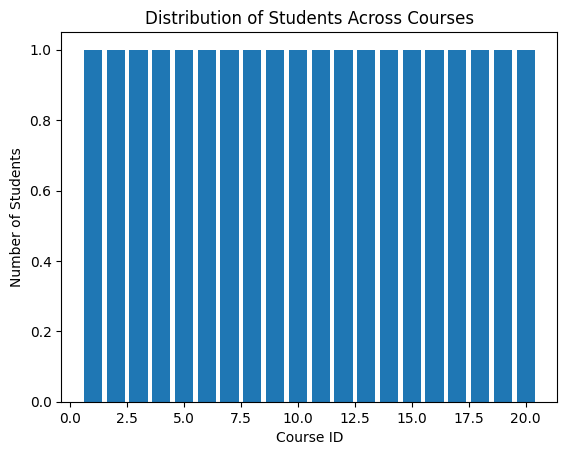

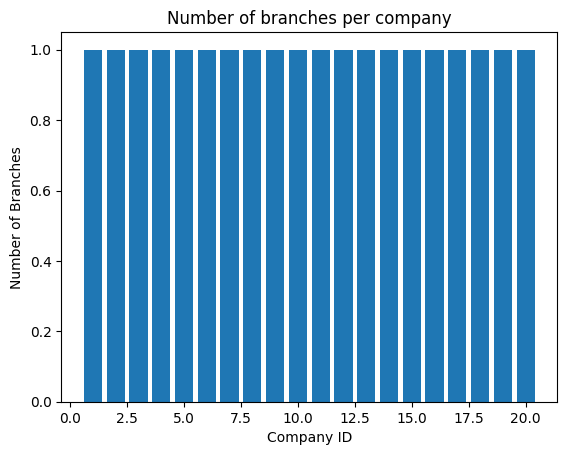

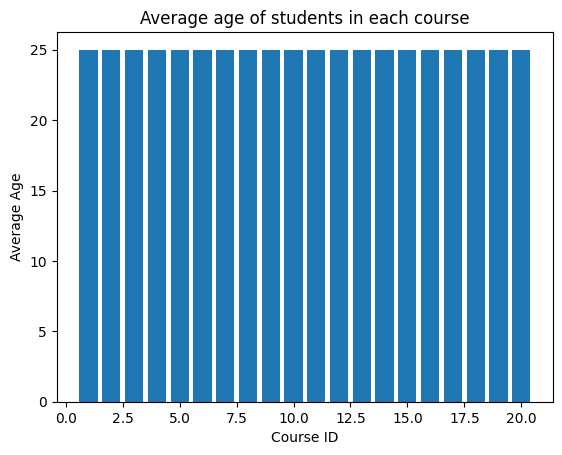

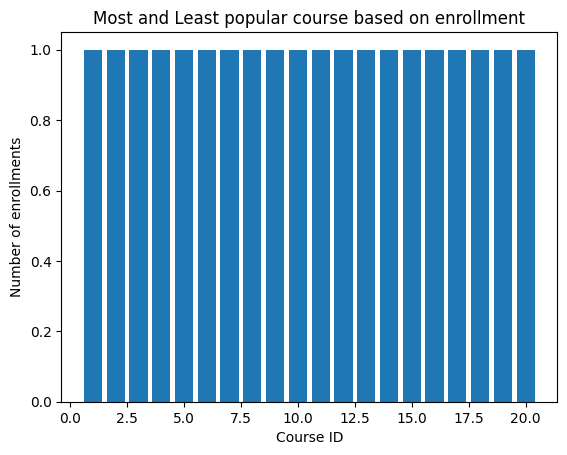

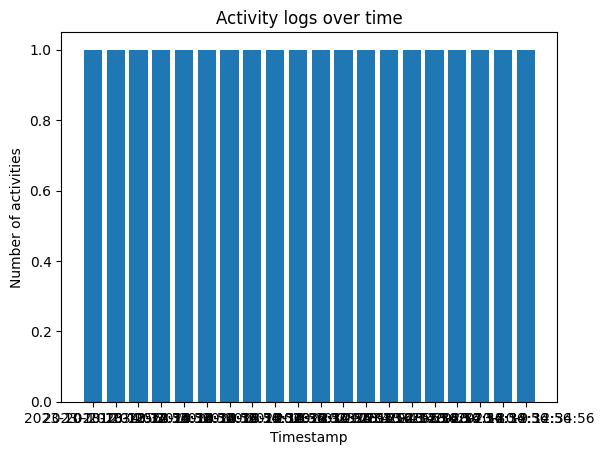

In [101]:
# main function
if __name__ == "__main__":
    conn = connect_to_db("education_company.db")
    if conn:


        # Data analytics dashboard
        print("\nData analytics dashboard: ")
        data_analytics_dashboard(conn)

        conn.close()

In [102]:
# function to remove 5 rows from each tables
def remove_rows(conn):
    try:
        cursor = conn.cursor()

        # list of table names
        tables = ["Companies","Branches","Courses","Students","Enrollment","Logging","Teacher","Department"]

        # remove 5 rows from each table
        for table in tables:
            cursor.execute(f"DELETE FROM {table} WHERE id in (SELECT id FROM {table} LIMIT 5)")

        # commit the transaction
        conn.commit()

        print("5 rows removed from each table successfully.")

    except sqlite3.Error as e:
        conn.rollback()
        print(f"Error occured : {e}")

In [103]:
# function to insert 20 rows of realistic data into each table
def insert_realistics_data(conn):
    try:
        cursor = conn.cursor()

        # insert 20 new rows into company table
        companies = [('Google','Mountain View'),('Microsoft','Redmond'),('Apple','Cupertino'),('Amazon','Seattle'),('Facebook','Menlo Park')]
        for i, (name,hq) in enumerate(companies * 4):
            cursor.execute("INSERT INTO Companies name(name, headquarters) VALUES(?,?)",(f"{name}{i+1}",hq))

        # insert 20 new rows into Branches table
        for i in range(1,21):
            cursor.execute("INSERT INTO Branches (company_id, location) VALUES (?,?)",(i % 5 + 1,f"BranchLocation{i}"))

         # Insert 20 sample rows into Enrollment table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Enrollment(student_id, course_id, enrollment_date) VALUES (?, ?, ?)",
                           (i, i % 5 + 1, f"2023-10-{i % 30 + 1}"))

        # Insert 20 sample rows into Logging table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Logging(activity, timestamp) VALUES (?, ?)", (f"Activity{i}", f"2023-10-{i % 30 + 1} 12:34:56"))

        # Insert 20 sample rows into Teacher table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Teachers(branch_id, name, subject) VALUES (?, ?, ?)",
                           (i % 5 + 1, f"Teacher{i}", f"Subject{i}"))

        # Insert 20 sample rows into Department table
        for i in range(1, 21):
            cursor.execute("INSERT INTO Department(branch_id, name) VALUES (?, ?)", (i% 5 + 1, f"Department{i}"))

        # Commit the transaction
        conn.commit()
        print("20 new rows of realistics data inserted into each table successfully. ")

    except sqlite3.Error as e:
        conn.rollback()
        print(f"Error occurred: {e}")


Connected to education_company.db successfully.
Error occured : no such table: Teacher

Data analytics dashboard: 


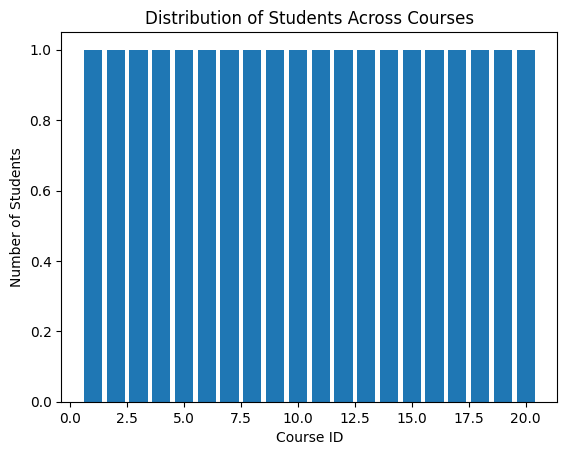

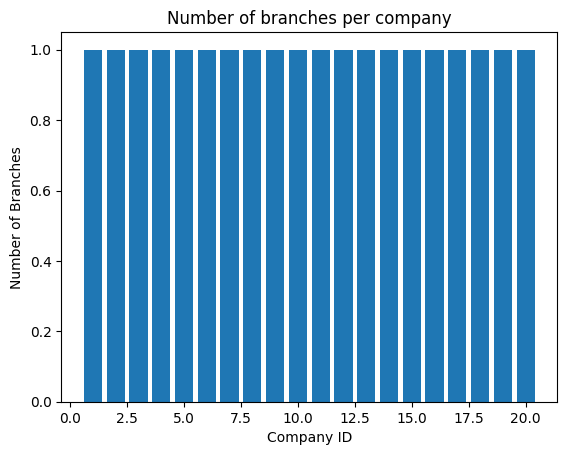

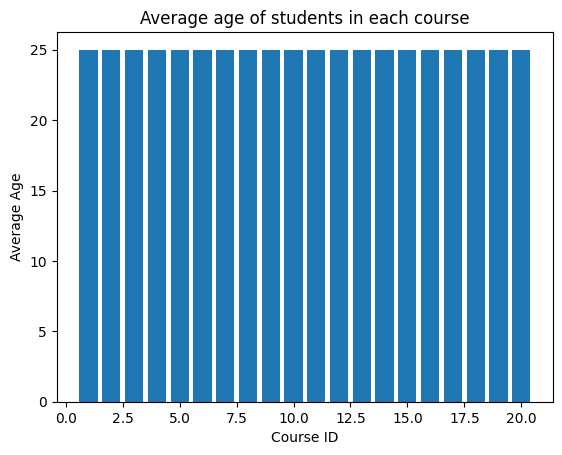

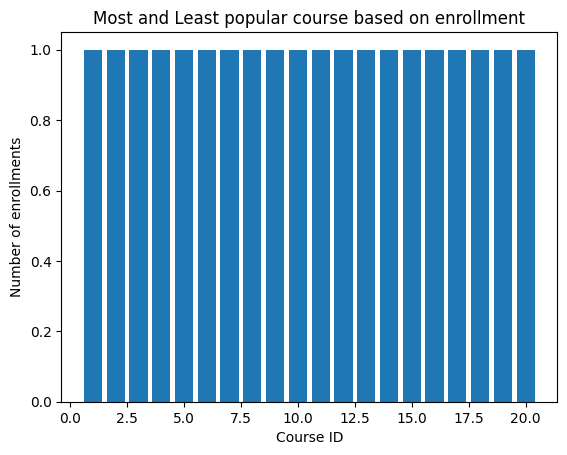

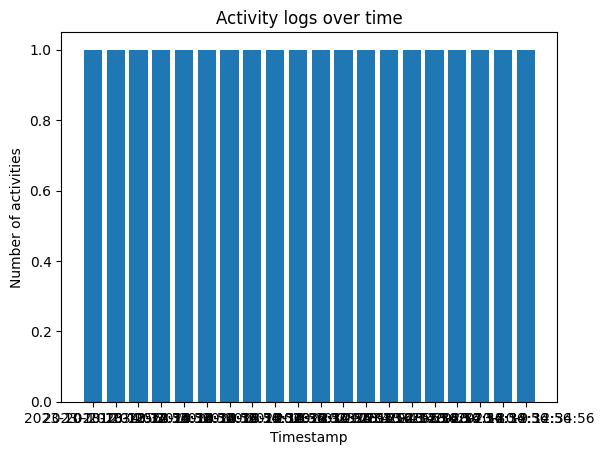

In [104]:
# main function
if __name__ == "__main__":
    conn = connect_to_db("education_company.db")
    if conn:
        # remove 5 rows from each table
        remove_rows(conn)

        # Data analytics dashboard
        print("\nData analytics dashboard: ")
        data_analytics_dashboard(conn)

        conn.close()